In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('data.csv')
df.head()

In [ ]:
sns.scatterplot(df['Sum'], df['Days']);

In [ ]:
data = df[['Sum', 'Days']]

n_clusters = list(range(2, 7))
metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k).fit(data)
  score = silhouette_score(data, km.labels_)
  metrics.append(score)

In [ ]:
sns.lineplot(n_clusters, metrics);


In [ ]:

print('\n' * 20)

# Видео 2

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('14.2 data.csv')
df.head()

,Sum,Days,Color
0,22.072345,36.758307,1
1,37.936710,55.784810,1
2,21.083576,47.319176,1
3,31.120670,54.406780,1
4,43.711550,42.557729,1


<Axes: xlabel='Sum', ylabel='Days'>

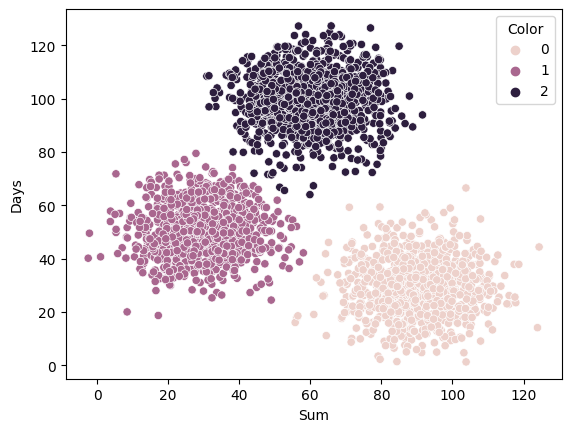

In [12]:
sns.scatterplot(x=df['Sum'], y=df['Days'], hue=df['Color'])

In [13]:
features = ['Sum', 'Days']

df_g = df.groupby('Color').agg({x: ['mean', 'std'] for x in features}).T
df_g

Color              0          1          2
Sum  mean  89.924184  29.311610  60.623093
     std   10.463459  10.052721  10.166339
Days mean  29.880359  50.541746  99.530350
     std   10.324979   9.704615   9.954158

In [14]:
import numpy as np

functions = ['mean', 'std']

stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

Color              0          1          2     Global
Sum  mean  89.924184  29.311610  60.623093  60.611358
     std   10.463459  10.052721  10.166339  25.859054
Days mean  29.880359  50.541746  99.530350  62.862141
     std   10.324979   9.704615   9.954158  31.759714

In [15]:
cluster_labels = [0, 1, 2]

for label in cluster_labels:
  df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

Color              0          1          2     Global
Sum  mean  48.361935 -51.640071   0.019361  60.611358
     std  -59.536575 -61.124946 -60.685573  25.859054
Days mean -52.466845 -19.599070  58.331148  62.862141
     std  -67.490329 -69.443634 -68.657911  31.759714

<Axes: xlabel='Color', ylabel='None-None'>

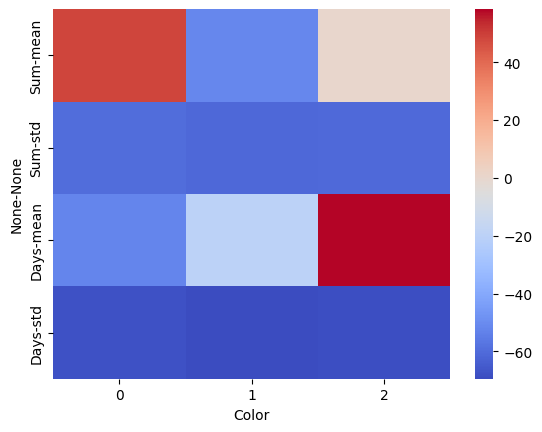

In [16]:
sns.heatmap(df_g_rel[cluster_labels], cmap='coolwarm')

# Видео 3

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('14.3 st900.csv')
df.head()

,Device1_X,Device1_Y,Device2_X,Device2_Y
0,-1.357818,-2.071201,3.51,8.23
1,-0.011177,1.705894,1.15,7.98
2,0.984379,0.236823,0.36,9.50
3,-3.032441,1.158165,0.75,8.45
4,-0.653970,2.226539,0.73,8.27


In [4]:
df.shape

(500, 4)

In [5]:
km = KMeans(n_clusters=4).fit(df)
labels = km.labels_

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20)
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)
data

,0,1
0,0.380140,-15.653997
1,-4.937789,-19.926811
2,-6.899397,-20.602695
3,-2.077763,-20.614185
4,-4.350203,-20.162659
...,...,...
495,21.830694,7.385902
496,25.294270,0.919264
497,25.349298,0.438901
498,22.731449,6.538978


<Axes: xlabel='0', ylabel='1'>

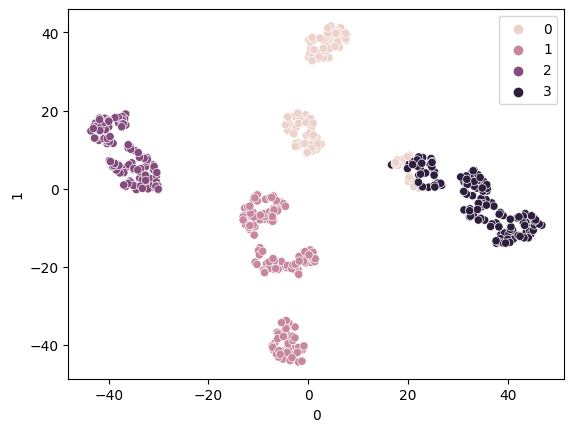

In [8]:
sns.scatterplot(x=data[0], y=data[1], hue=labels)